In [1]:
import pandas as pd
import numpy as np
import math
from  matplotlib import pyplot as plt
import seaborn as sns

train_data = pd.read_csv("D2_train_20.csv")
train_data = np.array(train_data)

test_data = pd.read_csv("D2_test_20.csv")
test_data =np.array(test_data)

N = len(train_data)
D = len(train_data[0])-1

class_list0 = []
class_list1 = []
class_list2 =[]
class_list3 =[]

for i in range(len(test_data)):
    class_list0.append(test_data[i][0:2])

class_list0 = np.array(class_list0)    


for j in range(N):
    if(0 == train_data[j][2]):
        class_list1.append(train_data[j][0:2])
    elif(1 == train_data[j][2]):
        class_list2.append(train_data[j][0:2])
    else:
        class_list3.append(train_data[j][0:2])   



class_array0 = np.array(class_list1)
class_array1 = np.array(class_list2)
class_array2 = np.array(class_list3) 

n0 = len(class_array0)
n1 = len(class_array1)
n2 = len(class_array2)

pc0 = n0/(n0+n1+n2)
pc1 = n1/(n0+n1+n2)
pc2 =n2/(n0+n1+n2)

#upto here we have divided the given training data into 3 classes    

#print(u01)     14.03480053374627
#print(u02)     -24.0187244371603

#print(u11)     6.622056227464288
# print(u12)    12.544383705540193

#print(u21)     -0.3092042486422039
#print(u22)     -14.153606248427842  


def find_mean(ind):     #it will return the list with mean 
    temp_array = np.array([])
    if(ind ==0 ):
        temp_array = class_array0
    elif(ind ==1):
        temp_array = class_array1
    else:
        temp_array = class_array2        

    u1 =0
    u2 =0
    length = len(temp_array)
    for i in range(length):
        u1 = u1 + temp_array[i][0]
        u2 = u2 + temp_array[i][1]
    u1 = u1/length
    u2 = u2/length  

    return [u1,u2] 

def find_cov_mat(ind,k):
    if(ind == 1):
        return np.array([[1,0],[0,1]])
    elif(ind == 3):
        #covarience same for all classes on dataset2
        x1_array = []
        x2_array = []
        for i in range(N):
            x1_array.append(train_data[i][0])
            x2_array.append(train_data[i][1])
        x1_array = np.array(x1_array)
        x2_array = np.array(x2_array)  
        # print("x1_ val, x2_var are : ",np.var(x1_array), np.var(x2_array, ddof=1))  
        return np.array([[np.var(x1_array, ddof=1),0],[0,np.var(x2_array, ddof=1)]])

    elif(ind == 5):
        #covarience different for all classes on dataset2
        x1_array = []
        x2_array = []
        if(k==0):
            for i in range(len(class_list1)):
                x1_array.append(class_list1[i][0])
                x2_array.append(class_list1[i][1])
        elif(k==1):
            for i in range(len(class_list2)):
                x1_array.append(class_list2[i][0])
                x2_array.append(class_list2[i][1])
        elif(k==2):
            for i in range(len(class_list3)):
                x1_array.append(class_list3[i][0])
                x2_array.append(class_list3[i][1])        
        return np.array([[np.var(x1_array, ddof=1),0],[0,np.var(x2_array, ddof=1)]])
        
    else:
        return np.array([[1,0],[0,1]])
        


def find_prob(x1,u1,D,ind,k):  # it will find the probability of x present in the class with mean vector as u

    # cov_mat = np.array([[1,0],[0,1]])
    cov_mat = find_cov_mat(ind,k)
    x = np.transpose(x1)
    u = np.transpose(u1)
    
    Num1 = np.transpose(x-u)
    # Num2 = (sigma)inverse , here in this case it is identity matrix
    Num2 = np.linalg.inv(cov_mat)

    Num3 = x-u

    Num4 = (np.dot(Num1, np.dot(Num2, Num3)))*(-1/2)

    Num = math.exp(Num4)

    Den1 = pow((2*(math.pi)),D/2)  
    Den2 = math.sqrt(np.linalg.det(cov_mat))

    Den = Den1 * Den2

    return Num/Den



def find_class(x,ind):  #this function takes a test sample and predicts the class of the sample
    #step-1 finding mean vector 
    u0 = np.array(find_mean(0))  #these are arrays
    u1 = np.array(find_mean(1))
    u2 = np.array(find_mean(2))

    p0 = (find_prob(x,u0,D,ind,0))*(pc0)
    p1 = (find_prob(x,u1,D,ind,1))*(pc1)
    p2 = (find_prob(x,u2,D,ind,2))*(pc2)
    
    p=[p0,p1,p2]

    return p.index(max(p))

#step-2: now we have to predict the class for each sample of the testing data
def predict_fun(X,ind):  #predict function that takes the training set and returns the predicted class list
    return  [find_class(x[0:2],ind) for x in X]

def predict_list_fun(ind,data_name):
    predicted_list = predict_fun(data_name,ind)
    return predicted_list

def find_accuracy(ind):
    actual_list1 = [x[2] for x in train_data]
    actual_list2 = [x[2] for x in test_data]
    predicted_list1 = predict_list_fun(ind,train_data)
    predicted_list2 = predict_list_fun(ind,test_data)
    match = 0
    temp_list = []
    
    for i in range(len(actual_list1)):
        if(actual_list1[i] == predicted_list1[i]):
            match = match + 1
    temp_list.append((match/len(actual_list1))*100)

    match = 0
    for i in range(len(actual_list2)):
        if(actual_list2[i] == predicted_list2[i]):
            match = match + 1  
    temp_list.append((match/len(actual_list2))*100)          
            
    return np.array(temp_list)

def print_confusion_matrix(ind):
    actual_list1 = [x[2] for x in train_data]
    actual_list2 = [x[2] for x in test_data]
    predicted_list1 = predict_list_fun(ind, train_data)
    predicted_list2 = predict_list_fun(ind, test_data)

    cf_mat_train = np.zeros((3,3))
    cf_mat_test  = np.zeros((3,3))


    for i in range(len(actual_list1)):
        x = int(actual_list1[i])
        y = int(predicted_list1[i])

        cf_mat_train[x][y] +=1

    for i in range(len(actual_list2)):
        x = int(actual_list2[i])
        y = int(predicted_list2[i])

        cf_mat_test[x][y] +=1   
        
    fig = plt.figure(figsize=(4, 3))
    print("confusion matrix for train_dataset: ")
    sns.heatmap(cf_mat_train, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('confusion mat for train data')
    plt.show()
    # print(cf_mat_train)  
    
    fig = plt.figure(figsize=(4, 3))
    print("confusion matrix on test_dataset: ")
    sns.heatmap(cf_mat_test, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('confusion mat for test data')
    plt.show()
    # print(cf_mat_test)

def plot_fun(ind):
  

  fig = plt.figure(figsize=(4, 3))
  plt.xlabel("x")
  plt.ylabel("y")

  x_min,x_max = train_data[:,0].min()-0.5, train_data[:,0].max()+0.5
  y_min,y_max = train_data[:,1].min()-0.5, train_data[:,1].max()+0.5
  xx,yy = np.meshgrid(np.arange(x_min,x_max,1),np.arange(y_min,y_max,1)) #change according to requirement
#   z = predicte(np.c_[xx.ravel(),yy.ravel()])[:,2]
  sample_data = []
  for i in range(len(xx)):
        for j in range(len(xx[0])):
            sample_data.append([xx[i][j], yy[i][j]])
            
  z= np.array(predict_list_fun(ind,sample_data))
  z = z.reshape(xx.shape)

  #palette = ['mocassin','lightsteelblue'] , palette = ['orange','cyan'] , palette = ['darkorange','c']
  plt.contourf(xx, yy, z)
  #sns.scatterplot(x = train_data[:,0], y = train_data[:,1], hue = train_data[:,2])
  sns.scatterplot(x = test_data[:,0], y = test_data[:,1], hue = test_data[:,2])

  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

  plt.title("Naive Bayes")
  plt.show()


# predicted_list 


Question 2a: 
Accuracy on train data :  100.0
Accuracy on test data  : 99.0
confusion matrix for train_dataset: 


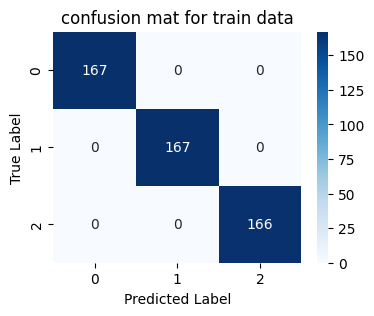

confusion matrix on test_dataset: 


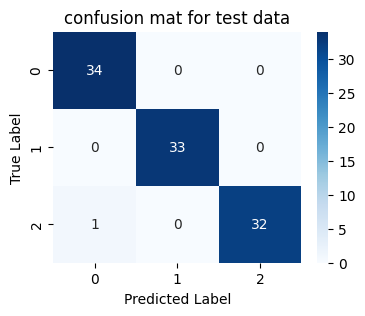

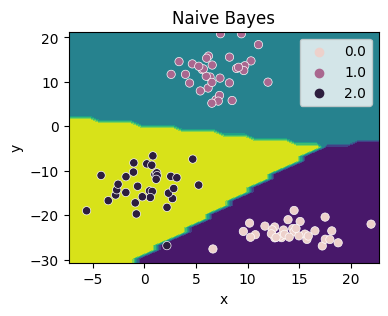

In [2]:
print("Question 2a: ")
acc_array = find_accuracy(1)

print("Accuracy on train data : ", acc_array[0])
print("Accuracy on test data  :",  acc_array[1])
print_confusion_matrix(1)
plot_fun(1)

Question 2c: 
Accuracy on train data :  99.8
Accuracy on test data  : 100.0
confusion matrix for train_dataset: 


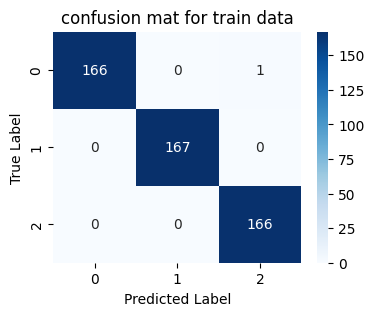

confusion matrix on test_dataset: 


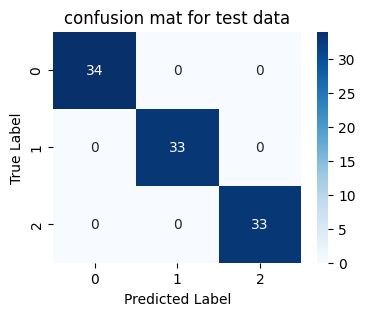

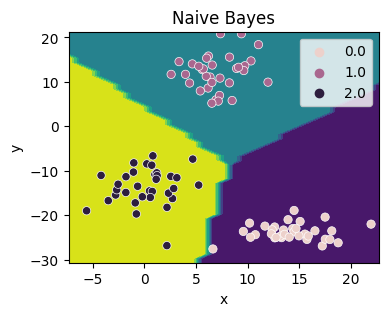

In [3]:
print("Question 2c: ")

acc_array = find_accuracy(3)

print("Accuracy on train data : ", acc_array[0])
print("Accuracy on test data  :",  acc_array[1])

print_confusion_matrix(3)
plot_fun(3)

Question 2e: 
Accuracy on train data :  100.0
Accuracy on test data  : 100.0
confusion matrix for train_dataset: 


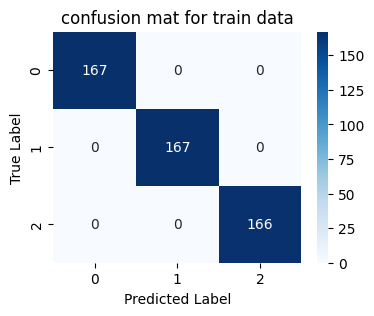

confusion matrix on test_dataset: 


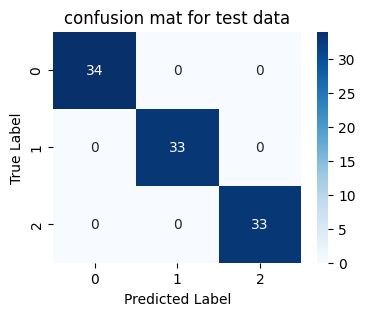

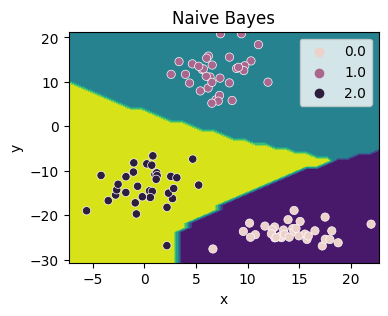

In [4]:
print("Question 2e: ")

acc_array = find_accuracy(5)

print("Accuracy on train data : ", acc_array[0])
print("Accuracy on test data  :",  acc_array[1])

print_confusion_matrix(5)
plot_fun(5)

In [5]:
import pandas as pd
import numpy as np
import math
from  matplotlib import pyplot as plt
import seaborn as sns

train_data = pd.read_csv("D3_train_20.csv")
train_data = np.array(train_data)

test_data = pd.read_csv("D3_test_20.csv")
test_data =np.array(test_data)

N = len(train_data)
D = len(train_data[0])-1

class_list1 = []
class_list2 =[]
class_list3 =[]


for j in range(N):
    if(0 == train_data[j][2]):
        class_list1.append(train_data[j][0:2])
    elif(1 == train_data[j][2]):
        class_list2.append(train_data[j][0:2])
    else:
        class_list3.append(train_data[j][0:2])   



class_array0 = np.array(class_list1)
class_array1 = np.array(class_list2)
class_array2 = np.array(class_list3) 

n0 = len(class_array0)
n1 = len(class_array1)
n2 = len(class_array2)

pc0 = n0/(n0+n1+n2)
pc1 = n1/(n0+n1+n2)
pc2 =n2/(n0+n1+n2)

#upto here we have divided the given training data into 3 classes    

#print(u01)     14.03480053374627
#print(u02)     -24.0187244371603

#print(u11)     6.622056227464288
# print(u12)    12.544383705540193

#print(u21)     -0.3092042486422039
#print(u22)     -14.153606248427842  


def find_mean(ind):     #it will return the list with mean 
    temp_array = np.array([])
    if(ind ==0 ):
        temp_array = class_array0
    elif(ind ==1):
        temp_array = class_array1
    else:
        temp_array = class_array2        

    u1 =0
    u2 =0
    length = len(temp_array)
    for i in range(length):
        u1 = u1 + temp_array[i][0]
        u2 = u2 + temp_array[i][1]
    u1 = u1/length
    u2 = u2/length  

    return [u1,u2] 

def find_cov_mat(ind,k):
    if(ind == 2):
        return np.array([[1,0],[0,1]])
    elif(ind == 4):
        #covarience same for all classes on dataset2
        x1_array = []
        x2_array = []
        for i in range(N):
            x1_array.append(train_data[i][0])
            x2_array.append(train_data[i][1])
        x1_array = np.array(x1_array)
        x2_array = np.array(x2_array)    
        return np.array([[np.var(x1_array, ddof=1),0],[0,np.var(x2_array, ddof=1)]])

    elif(ind == 6):
        #covarience different for all classes on dataset2
        x1_array = []
        x2_array = []
        if(k==0):
            for i in range(len(class_list1)):
                x1_array.append(class_list1[i][0])
                x2_array.append(class_list1[i][1])
        elif(k==1):
            for i in range(len(class_list2)):
                x1_array.append(class_list2[i][0])
                x2_array.append(class_list2[i][1])
        x1_array = np.array(x1_array)
        x2_array = np.array(x2_array)      
        return np.array([[np.var(x1_array, ddof=1),0],[0,np.var(x2_array, ddof=1)]])        

    else:
        return np.array([[1,0],[0,1]])
        


def find_prob(x1,u1,D,ind,k):  # it will find the probability of x present in the class with mean vector as u

    # cov_mat = np.array([[1,0],[0,1]])
    cov_mat = find_cov_mat(ind,k)
    x = np.transpose(x1)
    u = np.transpose(u1)
    
    Num1 = np.transpose(x-u)
    # Num2 = (sigma)inverse , here in this case it is identity matrix
    Num2 = np.linalg.inv(cov_mat)

    Num3 = x-u

    Num4 = (np.dot(Num1, np.dot(Num2, Num3)))*(-1/2)

    Num = math.exp(Num4)

    Den1 = pow((2*(math.pi)),D/2)  
    Den2 = math.sqrt(np.linalg.det(cov_mat))

    Den = Den1 * Den2

    return Num/Den



def find_class(x,ind):  #this function takes a test sample and predicts the class of the sample
    #step-1 finding mean vector 
    u0 = np.array(find_mean(0))  #these are arrays
    u1 = np.array(find_mean(1))
    #u2 = np.array(find_mean(2))

    p0 = (find_prob(x,u0,D,ind,0))*(pc0)
    p1 = (find_prob(x,u1,D,ind,1))*(pc1)
    #p2 = (find_prob(x,u2,D,ind))*(pc2)
    
    #p=[p0,p1,p2]
    p = [p0, p1]

    return p.index(max(p))

#step-2: now we have to predict the class for each sample of the testing data
def predict_fun(X,ind):  #predict function that takes the training set and returns the predicted class list
    return  [find_class(x[0:2],ind) for x in X]

def predict_list_fun(ind,temp_data):
    predicted_list = predict_fun(temp_data,ind)
    return predicted_list


def find_accuracy(ind):
    actual_list1 = [x[2] for x in train_data]
    actual_list2 = [x[2] for x in test_data]
    predicted_list1 = predict_list_fun(ind,train_data)
    predicted_list2 = predict_list_fun(ind,test_data)
    match = 0
    temp_list = []
    
    for i in range(len(actual_list1)):
        if(actual_list1[i] == predicted_list1[i]):
            match = match + 1
    temp_list.append((match/len(actual_list1))*100)

    match = 0
    for i in range(len(actual_list2)):
        if(actual_list2[i] == predicted_list2[i]):
            match = match + 1  
    temp_list.append((match/len(actual_list2))*100)          
            
    return np.array(temp_list)

def print_confusion_matrix(ind):
    actual_list1 = [x[2] for x in train_data]
    actual_list2 = [x[2] for x in test_data]
    predicted_list1 = predict_list_fun(ind, train_data)
    predicted_list2 = predict_list_fun(ind, test_data)

    cf_mat_train = np.zeros((2,2))
    cf_mat_test  = np.zeros((2,2))


    for i in range(len(actual_list1)):
        x = int(actual_list1[i])
        y = int(predicted_list1[i])

        cf_mat_train[x][y] +=1

    for i in range(len(actual_list2)):
        x = int(actual_list2[i])
        y = int(predicted_list2[i])

        cf_mat_test[x][y] +=1   

    fig = plt.figure(figsize=(4, 3))
    print("confusion matrix for train_dataset: ")
    sns.heatmap(cf_mat_train, annot=True, cmap='coolwarm', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('confusion mat on train data')
    plt.show()
    # print(cf_mat_train)  

    fig = plt.figure(figsize=(4, 3))
    print("confusion matrix on test_dataset: ")
    sns.heatmap(cf_mat_test, annot=True, cmap='coolwarm', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('confusion mat on test data')
    plt.show()
    # print(cf_mat_test)   

def plot_fun(ind):
  

  fig = plt.figure(figsize=(4, 3))
  plt.xlabel("x")
  plt.ylabel("y")

  x_min,x_max = train_data[:,0].min()-0.5, train_data[:,0].max()+0.5
  y_min,y_max = train_data[:,1].min()-0.5, train_data[:,1].max()+0.5
  xx,yy = np.meshgrid(np.arange(x_min,x_max,1),np.arange(y_min,y_max,1)) #change according to requirement
#   z = predicte(np.c_[xx.ravel(),yy.ravel()])[:,2]
  sample_data = []
  for i in range(len(xx)):
        for j in range(len(xx[0])):
            sample_data.append([xx[i][j], yy[i][j]])
            
  z= np.array(predict_list_fun(ind,sample_data))
  z = z.reshape(xx.shape)

  #palette = ['mocassin','lightsteelblue'] , palette = ['orange','cyan'] , palette = ['darkorange','c']
  plt.contourf(xx, yy, z)
  #sns.scatterplot(x = train_data[:,0], y = train_data[:,1], hue = train_data[:,2])
  sns.scatterplot(x = test_data[:,0], y = test_data[:,1], hue = test_data[:,2])

  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

  plt.title("Naive Bayes")
  plt.show()    
    


# predicted_list 


Question 2b: 
Accuracy on train data :  79.2
Accuracy on test data  : 76.0
confusion matrix for train_dataset: 


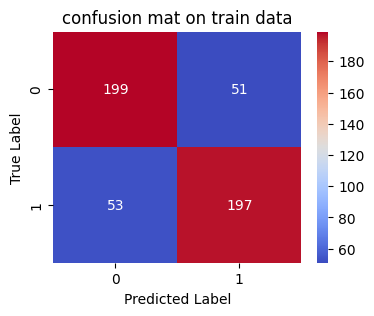

confusion matrix on test_dataset: 


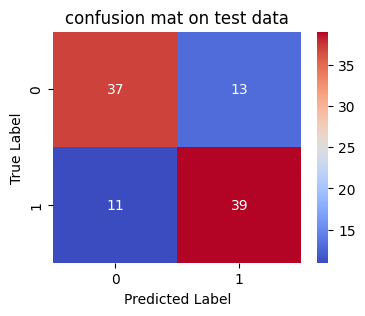

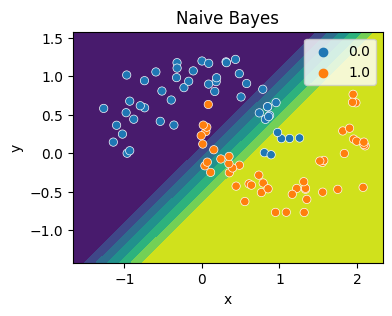

In [6]:
print("Question 2b: ")

acc_array = find_accuracy(2)

print("Accuracy on train data : ", acc_array[0])
print("Accuracy on test data  :",  acc_array[1])

print_confusion_matrix(2)
plot_fun(2)

Question 2d: 
Accuracy on train data :  86.0
Accuracy on test data  : 88.0
confusion matrix for train_dataset: 


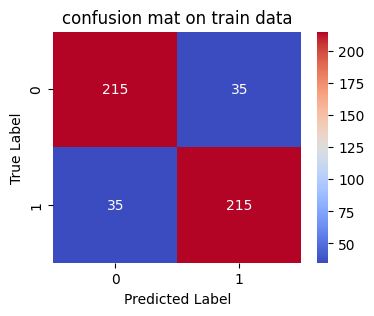

confusion matrix on test_dataset: 


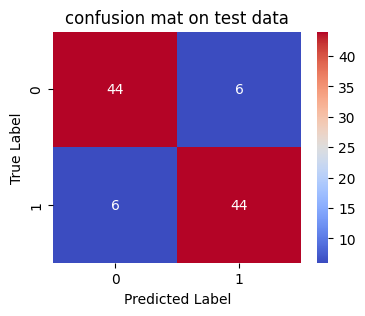

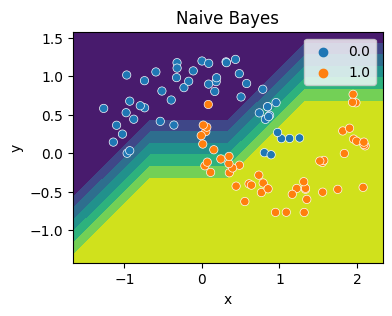

In [7]:
print("Question 2d: ")

acc_array = find_accuracy(4)

print("Accuracy on train data : ", acc_array[0])
print("Accuracy on test data  :",  acc_array[1])

print_confusion_matrix(4)
plot_fun(4)

Question 2f: 
Accuracy on train data :  87.4
Accuracy on test data  : 87.0
confusion matrix for train_dataset: 


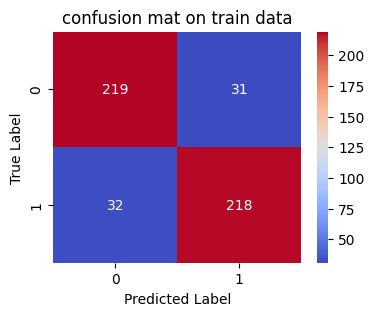

confusion matrix on test_dataset: 


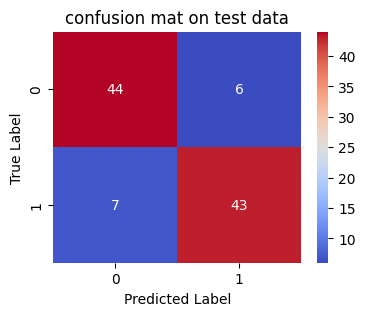

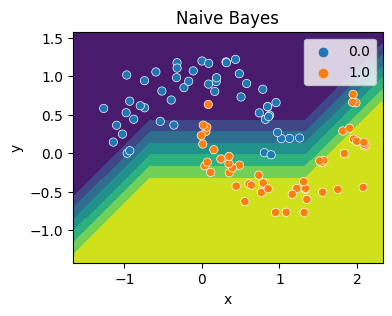

In [8]:
print("Question 2f: ")

acc_array = find_accuracy(6)

print("Accuracy on train data : ", acc_array[0])
print("Accuracy on test data  :",  acc_array[1])

print_confusion_matrix(6)
plot_fun(6)